# Economics data web scraping

Notebook to automate the collecting process of various economics temporal series.

## Brazilian Data

### CDI

In [1]:
url_cdi = 'http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/serie-historica-do-di.htm'

### IPCA

In [3]:
import os
from datetime import datetime
from ftplib import FTP
import zipfile
import pandas as pd

In [4]:
# ipca scraper config
# url: https://ftp.ibge.gov.br/Precos_Indices_de_Precos_ao_Consumidor/IPCA/Serie_Historica/ipca_SerieHist.zip
url_ipca = 'ftp.ibge.gov.br'
username_ipca = ''
password_ipca = ''
remote_path_ipca = '/Precos_Indices_de_Precos_ao_Consumidor/IPCA/Serie_Historica'
remote_file_ipca = 'ipca_SerieHist.zip'
local_path_ipca = ''

In [5]:
#create a folder
def create_folder_if_not_exists(folder_path):
    try:
        # Check if the folder exists
        if not os.path.exists(folder_path):
            # If not, create the folder
            os.makedirs(folder_path)
            print(f"Folder '{folder_path}' created successfully.")
        else:
            print(f"Folder '{folder_path}' already exists.")

    except Exception as e:
        print(f"Error: {e}")

In [6]:
def download_ftp_data(url, username, password, remote_path, remote_file, local_path):
    try:
        # Connect to the FTP server
        ftp = FTP(url)
        ftp.login(username, password)

        # Change to the remote directory
        ftp.cwd(remote_path)

        # Open a local file for writing
        with open(local_path+'/'+remote_file, 'wb') as local_file:
            # Retrieve the file from the FTP server
            ftp.retrbinary('RETR ' + remote_file, local_file.write)

        print(f"File downloaded successfully to {local_path}")

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Close the FTP connection
        if ftp:
            ftp.quit()

In [7]:
def unzip(file_path, file_name):
    try:
        with zipfile.ZipFile(file_path+'/'+file_name, 'r') as zip_ref:
            zip_ref.extractall(file_path)
        print(f"File unziped successfully to {file_path}")
    except Exception as e:
        print(f"Error: {e}")       

In [8]:
#get the timestamp and create a folder to store the downloaded raw data
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
local_path_ipca = 'raw_data/'+'ipca_raw_'+timestamp
create_folder_if_not_exists('raw_data')
create_folder_if_not_exists(local_path_ipca)

Folder 'raw_data' created successfully.
Folder 'raw_data/ipca_raw_20231119_204603' created successfully.


In [9]:
#download the ipca raw data from IBGE FTP to local_path folder
download_ftp_data(url_ipca, username_ipca, password_ipca, remote_path_ipca, remote_file_ipca,  local_path_ipca)

File downloaded successfully to raw_data/ipca_raw_20231119_204603


In [10]:
#unzip file
unzip(local_path_ipca, remote_file_ipca)

File unziped successfully to raw_data/ipca_raw_20231119_204603


In [11]:
#load excel file
files = os.listdir(local_path_ipca)

# Find the Excel file (assuming there's only one)
excel_file = next((file for file in files if file.endswith(('.xls', '.xlsx'))), None)

if excel_file:
    # If there's an Excel file, open it with pandas
    excel_file_path = os.path.join(local_path_ipca, excel_file)
    df = pd.read_excel(excel_file_path)

In [12]:
#clean-up the data loaded
df_ok = df.rename(columns={'Unnamed: 0': 'ref_year', 'Unnamed: 1': 'ref_month' , 'Unnamed: 3': 'month', 'Unnamed: 4': '3 months', 'Unnamed: 5': '6 months', 'Unnamed: 6': 'year', 'Unnamed: 7': '12 months'}).drop(columns='Unnamed: 2')
df_ok = df_ok.replace({'JAN':1, 'FEV':2, 'MAR':3, 'ABR':4, 'MAI':5, 'JUN':6, 'JUL':7, 'AGO':8, 'SET':9, 'OUT':10, 'NOV':11, 'DEZ':12}).replace({' ':pd.NA})#.dropna(how='all')#.replace(['NO',3,6,'NO',12],[pd.NA,pd.NA,pd.NA,pd.NA,pd.NA])#.reset_index(drop = True)#.apply(pd.to_numeric, errors='coerce')#.fillna(axis='index', method='ffill')
df_ok['ref_year'] = df_ok['ref_year'].fillna(axis='index', method='ffill')
df_ok = df_ok.dropna(how='any')
#pd.set_option('display.max_rows', None)
df_ok

,ref_year,ref_month,month,3 months,6 months,year,12 months
7,1994,1,41.31,162.13,533.33,41.31,2693.84
8,1994,2,40.27,171.24,568.17,98.22,3035.71
9,1994,3,42.75,182.96,602.93,182.96,3417.39
10,1994,4,42.68,185.71,648.92,303.73,3828.49
11,1994,5,44.03,193.36,695.71,481.49,4331.19
...,...,...,...,...,...,...,...
429,2023,6,-0.08,0.76,2.87,2.87,3.16
430,2023,7,0.12,0.27,2.45,2.99,3.99
431,2023,8,0.23,0.27,1.83,3.23,4.61
432,2023,9,0.26,0.61,1.38,3.5,5.19


In [13]:
df_ok.to_excel(local_path_ipca+'/'+"ipca_hist_series.xlsx")  

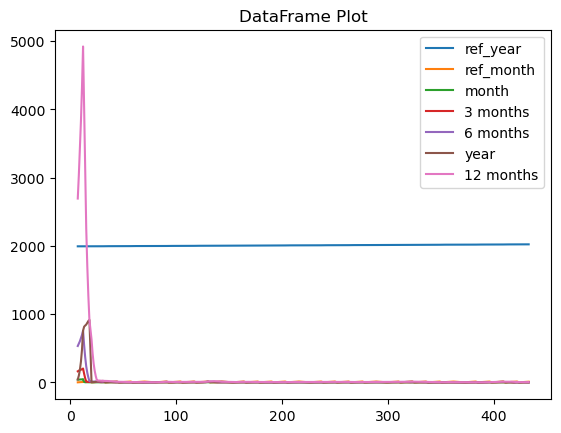

In [14]:
plot = df_ok.plot(title="DataFrame Plot")

### IGP-M

In [15]:
url_igpm = 'https://portal.fgv.br/noticias/igpm-resultados-2022'

## Dutch Data

### CPI

In [16]:
url_cpi = 'https://www.cbs.nl/en-gb/figures/detail/70936eng'